In [1]:
#used for handling the dataset
import pandas as pd  
#This module offers classes representing filesystem paths with semantics appropriate for different operating systems
from pathlib import Path 
#mathematical operations on arrays
import numpy as np 
#performs a regression task.
from sklearn.linear_model import LinearRegression 
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score 
 #Standardizes features by scaling each feature to a given range
from sklearn.preprocessing import StandardScaler, MinMaxScaler
!pip install config
#Compute the F1 score, also known as balanced F-score or F-measure
from sklearn.metrics import f1_score 
!pip install psycopg2
 # import keyword to make code in one module available in another
from config import *
#Psycopg is the most popular PostgreSQL database adapter for the Python programming language
import psycopg2 
##for data visualization
import matplotlib.pyplot as plt 
#used to visualize random distributions
import seaborn as sns

In [2]:
df=pd.read_csv("F1")

In [3]:
df.head()

,year,round,resultId,raceId,circuitId,driverId,constructorId,grid,position,podium,...,laps,points,races_name,name,code,number,nationality,dob,constructors_name,constructors_nationality
0,2017,1,23382,969,1,8,6,4,4,0,...,57,12,Australian Grand Prix,Kimi RÃ¤ikkÃ¶nen,RAI,7.0,Finnish,17-10-1979,Ferrari,Italian
1,2017,1,23379,969,1,20,6,2,1,1,...,57,25,Australian Grand Prix,Sebastian Vettel,VET,5.0,German,03-07-1987,Ferrari,Italian
2,2015,8,22676,933,70,3,131,2,1,1,...,71,25,Austrian Grand Prix,Nico Rosberg,ROS,6.0,German,27-06-1985,Mercedes,German
3,2015,1,22551,926,1,154,208,8,0,0,...,0,0,Australian Grand Prix,Romain Grosjean,GRO,8.0,French,17-04-1986,Lotus F1,British
4,2015,1,22549,926,1,8,6,5,0,0,...,40,0,Australian Grand Prix,Kimi RÃ¤ikkÃ¶nen,RAI,7.0,Finnish,17-10-1979,Ferrari,Italian


# Data Preprocessing 

In [4]:
print("Total rows:",df.shape[0])
print("Total Columns:",df.shape[1])
print("Unique values:\n\n",df.nunique())
df.info()

Total rows: 3300
Total Columns: 22
Unique values:

 year                           8
round                         22
resultId                    3300
raceId                       163
circuitId                     31
driverId                      47
constructorId                 17
grid                          23
position                      23
podium                         4
wins                           2
milliseconds                1615
laps                          79
points                        20
races_name                    37
name                          47
code                          46
number                        41
nationality                   24
dob                           47
constructors_name             17
constructors_nationality       8
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  

# Describing the Data

In [5]:
print(df.describe())

              year        round      resultId       raceId    circuitId  \
count  3300.000000  3300.000000   3300.000000  3300.000000  3300.000000   
mean   2018.521818    10.757576  24192.470000  1010.104242    26.848485   
std       2.305247     5.972709    955.726332    48.865269    25.718368   
min    2015.000000     1.000000  22538.000000   926.000000     1.000000   
25%    2016.000000     6.000000  23363.750000   968.000000     7.000000   
50%    2018.000000    11.000000  24192.500000  1009.000000    15.000000   
75%    2021.000000    16.000000  25020.250000  1053.000000    34.000000   
max    2022.000000    22.000000  25845.000000  1096.000000    79.000000   

          driverId  constructorId         grid     position       podium  \
count  3300.000000    3300.000000  3300.000000  3300.000000  3300.000000   
mean    621.925758      66.354545    10.367273     7.602727     0.296364   
std     354.409204      84.398252     5.911463     5.730858     0.777089   
min       1.000000  

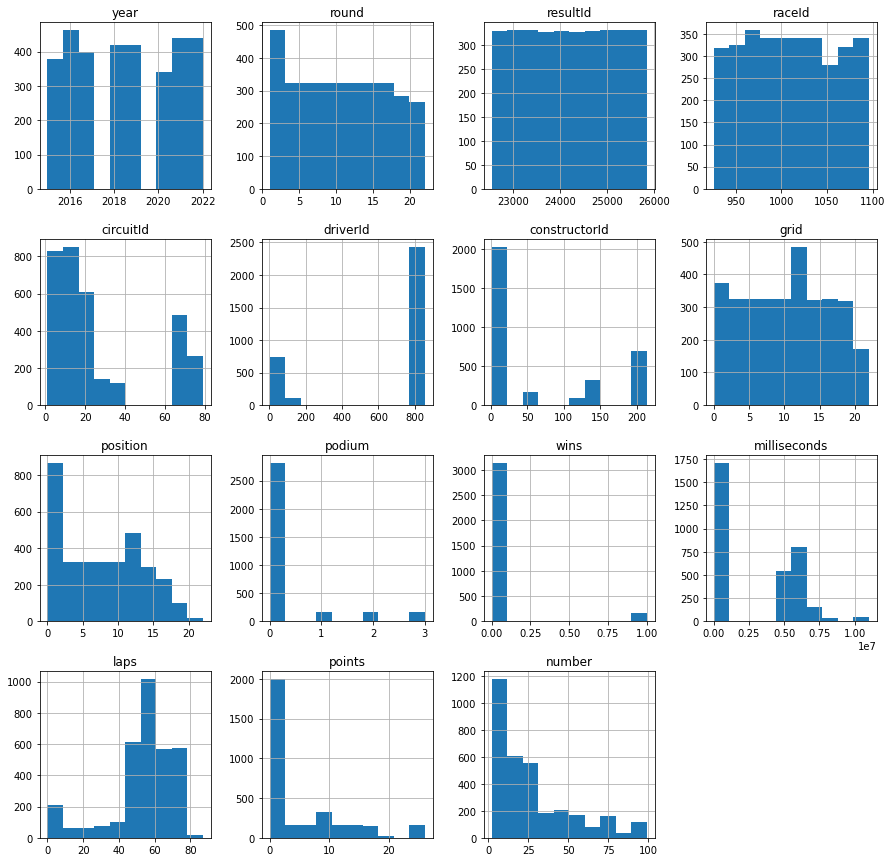

In [6]:
#plotting the data
df.hist(figsize=(15,15))
plt.show()

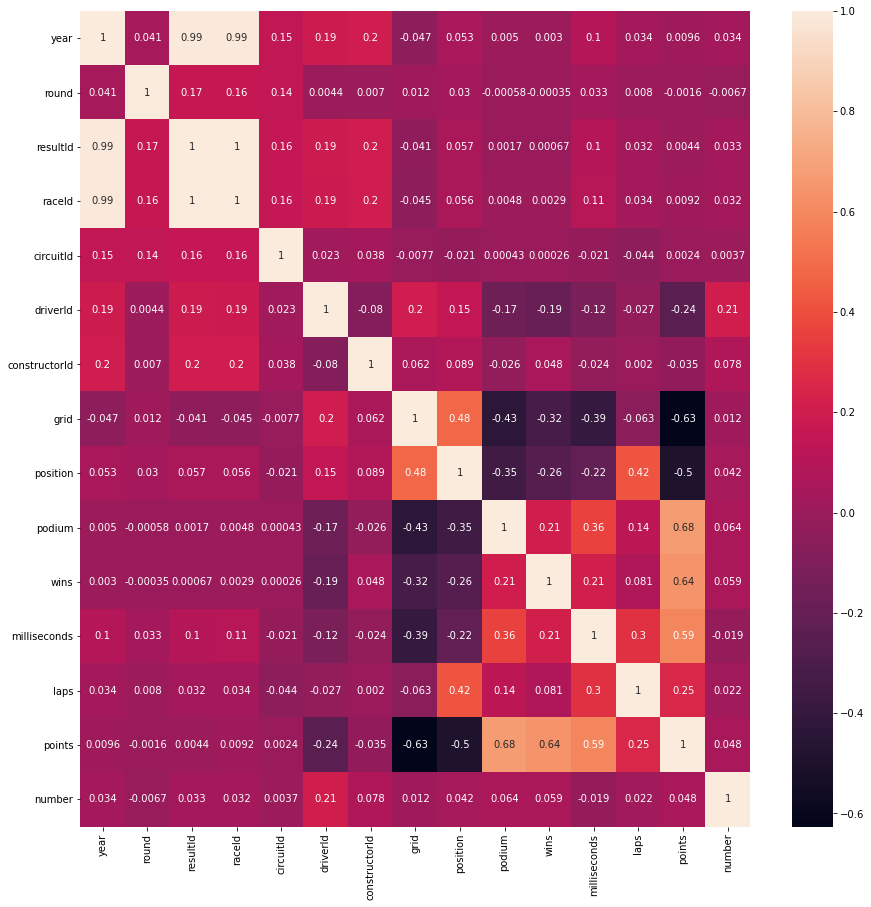

In [7]:
#correlation matrix
correlation_matrix=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix,annot=True)
plt.show()

<AxesSubplot:xlabel='laps', ylabel='count'>

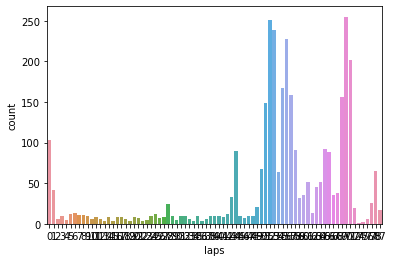

In [8]:
sns.countplot(x='laps', data=df)

<AxesSubplot:xlabel='races_name', ylabel='count'>

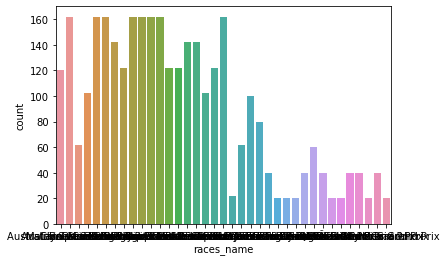

In [9]:
sns.countplot(x='races_name', data=df)

<AxesSubplot:xlabel='constructors_name', ylabel='count'>

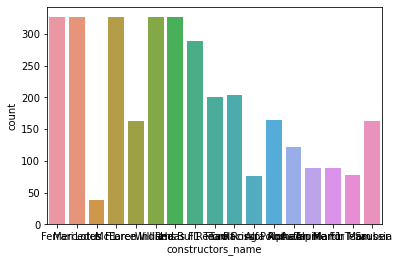

In [10]:
sns.countplot(x='constructors_name', data=df)

In [11]:
 # make and represent a hierarchically-cluster of the rows and the columns of the data

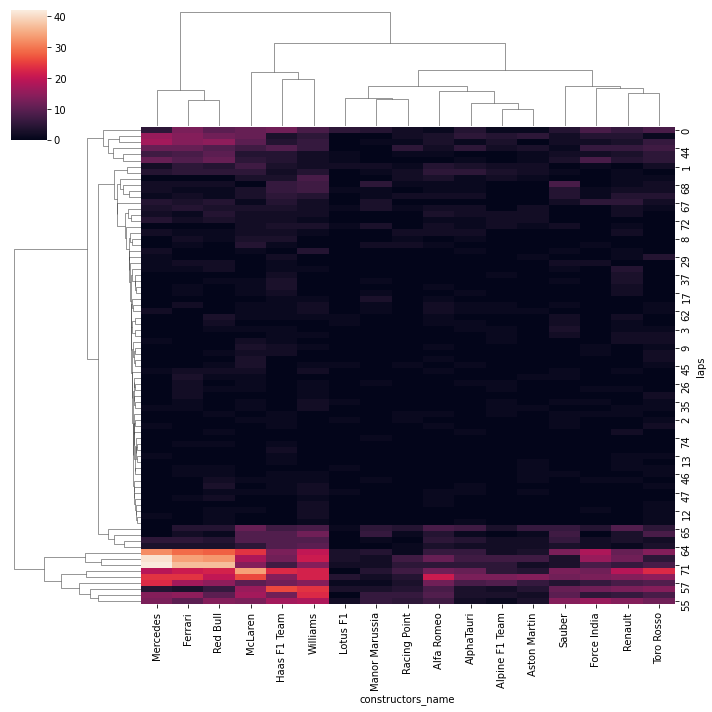

In [12]:
sns.clustermap(pd.crosstab(df['laps'], df['constructors_name']))
plt.show()

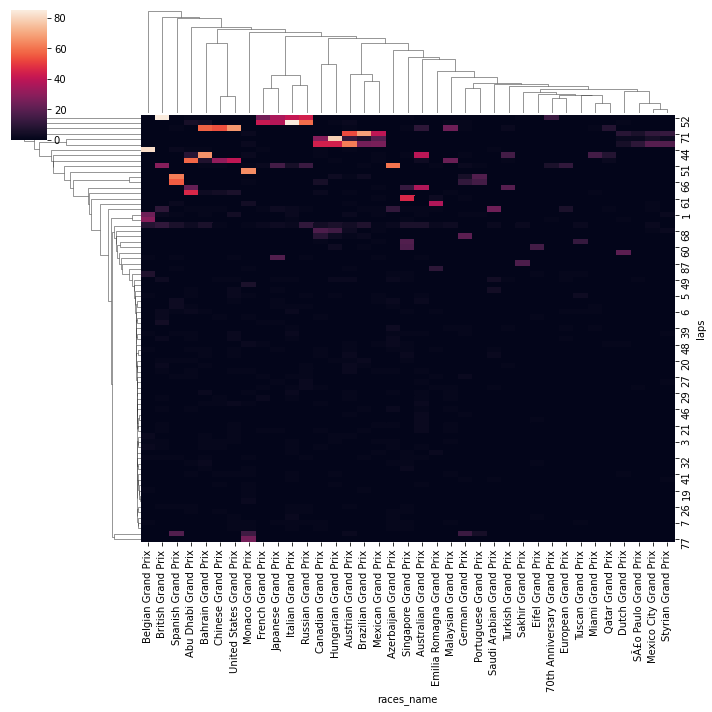

In [13]:
sns.clustermap(pd.crosstab(df['laps'], df['races_name']))
plt.show()

#  Data splitting into independent and dependent attributes

In [14]:
print("Total rows:",df.shape[0])
print("Total Columns:",df.shape[1])
print("Unique values:\n\n",df.nunique())
df.info()

Total rows: 3300
Total Columns: 22
Unique values:

 year                           8
round                         22
resultId                    3300
raceId                       163
circuitId                     31
driverId                      47
constructorId                 17
grid                          23
position                      23
podium                         4
wins                           2
milliseconds                1615
laps                          79
points                        20
races_name                    37
name                          47
code                          46
number                        41
nationality                   24
dob                           47
constructors_name             17
constructors_nationality       8
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  

In [15]:
df.head()

,year,round,resultId,raceId,circuitId,driverId,constructorId,grid,position,podium,...,laps,points,races_name,name,code,number,nationality,dob,constructors_name,constructors_nationality
0,2017,1,23382,969,1,8,6,4,4,0,...,57,12,Australian Grand Prix,Kimi RÃ¤ikkÃ¶nen,RAI,7.0,Finnish,17-10-1979,Ferrari,Italian
1,2017,1,23379,969,1,20,6,2,1,1,...,57,25,Australian Grand Prix,Sebastian Vettel,VET,5.0,German,03-07-1987,Ferrari,Italian
2,2015,8,22676,933,70,3,131,2,1,1,...,71,25,Austrian Grand Prix,Nico Rosberg,ROS,6.0,German,27-06-1985,Mercedes,German
3,2015,1,22551,926,1,154,208,8,0,0,...,0,0,Australian Grand Prix,Romain Grosjean,GRO,8.0,French,17-04-1986,Lotus F1,British
4,2015,1,22549,926,1,8,6,5,0,0,...,40,0,Australian Grand Prix,Kimi RÃ¤ikkÃ¶nen,RAI,7.0,Finnish,17-10-1979,Ferrari,Italian


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      3300 non-null   int64  
 1   round                     3300 non-null   int64  
 2   resultId                  3300 non-null   int64  
 3   raceId                    3300 non-null   int64  
 4   circuitId                 3300 non-null   int64  
 5   driverId                  3300 non-null   int64  
 6   constructorId             3300 non-null   int64  
 7   grid                      3300 non-null   int64  
 8   position                  3300 non-null   int64  
 9   podium                    3300 non-null   int64  
 10  wins                      3300 non-null   int64  
 11  milliseconds              3300 non-null   int64  
 12  laps                      3300 non-null   int64  
 13  points                    3300 non-null   int64  
 14  races_na

In [17]:
df2=df.copy() #The copy() method returns a copy of the DataFrame

Train/Test is a method to measure the accuracy of your model. It is called Train/Test because you split the data set into two sets: a training set and a testing set.We train the model using the training set.

x Train and y Train become data for the machine learning, capable to create a model.
Once the model is created, input x Test and the output should be equal to y Test.
The more closely the model output is to y Test: the more accurate the model is.

In [18]:
train = df2[df2['year']<=2021]
xtrain = train[['year', 'round', 'circuitId','driverId', 'constructorId','grid','milliseconds','laps']]
ytrain = train.wins

scaler = StandardScaler()
xtrain = pd.DataFrame(scaler.fit_transform(xtrain), columns = xtrain.columns)

# Create the test dataset
test = df2[(df2.year == 2022)]
test = test.reset_index()
xtest = test[['year', 'round', 'circuitId','driverId', 'constructorId','grid','milliseconds','laps']]
ytest = test.wins
xtest = pd.DataFrame(scaler.transform(xtest), columns = xtest.columns)

print("No.of samples in xtrain:",(xtrain.shape))
print("No.of samples in ytrain:",(ytrain.shape))
print("No.of samples in ytest:",train.shape)
print("No.of samples in xtest:",(test.shape))

No.of samples in xtrain: (2860, 8)
No.of samples in ytrain: (2860,)
No.of samples in ytest: (2860, 22)
No.of samples in xtest: (440, 23)


In [19]:
model = LinearRegression() # creating the model
model.fit(xtrain, ytrain) # fitting the model 

LinearRegression()

In [20]:
# Predict Outcome 
prediction = model.predict(xtest)


In [21]:
# convert probabilities to binary labels
threshold = 0.2
prediction_labels = np.where(prediction > threshold, 1, 0)
model_accuracy = accuracy_score(ytest, prediction_labels)
model_f1 = f1_score(ytest, prediction_labels, average='weighted')

print('Accuracy (classifier): ', "%.2f" % (model_accuracy*100))
print('F1 (classifier): ', "%.2f" % (model_f1*100))

Accuracy (classifier):  92.05
F1 (classifier):  91.07


In [22]:
from sklearn.metrics import r2_score
# Predicting the  Outcome probabilities
prediction = model.predict(xtest).reshape(-1,2)
#Data Frame for Expected Outcome Creation
Z = pd.DataFrame({"Prediction": prediction_labels, "Actual": ytest})
# Create second Data Frame for prediction probabilities
Z1 = pd.DataFrame(prediction, columns = ['probability_lose', 'probability_win'])
# Merging the Z and Z1 dataframes 
Z_final = pd.merge(Z, Z1, left_index=True, right_index=True, how='outer')

In [23]:
Z_final

,Prediction,Actual,probability_lose,probability_win
0,0,0,0.045190,0.055392
1,0,0,0.004469,-0.034905
2,0,0,0.183794,0.093061
3,0,0,0.147077,-0.001742
4,0,0,0.092268,0.187138
...,...,...,...,...
435,0,0,NaN,NaN
436,0,0,NaN,NaN
437,0,0,NaN,NaN
438,0,0,NaN,NaN


In [24]:
Z_final = (Z_final.merge(test, left_index=True, right_index=True, how='outer').reindex(
            columns=['raceId','round', 'constructorId', 'circuitId','driverId','grid', 'wins', 'probability_win', 'position','podium']))
print(Z_final.shape)
Z_final.head()

(440, 10)


,raceId,round,constructorId,circuitId,driverId,grid,wins,probability_win,position,podium
0,1074,1,213,3,842,10,0,0.055392,0,0
1,1074,1,9,3,815,4,0,-0.034905,18,0
2,1074,1,117,3,807,17,0,0.093061,17,0
3,1074,1,1,3,817,18,0,-0.001742,14,0
4,1074,1,214,3,4,8,0,0.187138,9,0


In [25]:
Z_final

,raceId,round,constructorId,circuitId,driverId,grid,wins,probability_win,position,podium
0,1074,1,213,3,842,10,0,0.055392,0,0
1,1074,1,9,3,815,4,0,-0.034905,18,0
2,1074,1,117,3,807,17,0,0.093061,17,0
3,1074,1,1,3,817,18,0,-0.001742,14,0
4,1074,1,214,3,4,8,0,0.187138,9,0
...,...,...,...,...,...,...,...,...,...,...
435,1089,16,51,14,855,9,0,NaN,10,0
436,1096,22,6,24,844,3,0,NaN,2,2
437,1096,22,51,24,822,18,0,NaN,15,0
438,1092,18,6,22,844,2,0,NaN,3,3


In [26]:
#We will group by "round" and determine which driver has the highest chance of winning that particular race or "round."
maxprob = Z_final.groupby(['raceId']).agg({'probability_win':'max'})
maxprob = maxprob.reset_index()
maxprob = maxprob.rename(columns={'probability_win':'proba_1_max'})

# We will then merge the proba_1_max column to Z_Final
Z_final = pd.merge(Z_final, maxprob, how='left', on=['raceId'])
print(Z_final.shape)
Z_final.head()

(440, 11)


,raceId,round,constructorId,circuitId,driverId,grid,wins,probability_win,position,podium,proba_1_max
0,1074,1,213,3,842,10,0,0.055392,0,0,0.187138
1,1074,1,9,3,815,4,0,-0.034905,18,0,0.187138
2,1074,1,117,3,807,17,0,0.093061,17,0,0.187138
3,1074,1,1,3,817,18,0,-0.001742,14,0,0.187138
4,1074,1,214,3,4,8,0,0.187138,9,0,0.187138


In [27]:
test.head()

,index,year,round,resultId,raceId,circuitId,driverId,constructorId,grid,position,...,laps,points,races_name,name,code,number,nationality,dob,constructors_name,constructors_nationality
0,986,2022,1,25425,1074,3,842,213,10,0,...,44,0,Bahrain Grand Prix,Pierre Gasly,GAS,10.0,French,07-02-1996,AlphaTauri,Italian
1,987,2022,1,25423,1074,3,815,9,4,18,...,56,0,Bahrain Grand Prix,Sergio PÃ©rez,PER,11.0,Mexican,26-01-1990,Red Bull,Austrian
2,988,2022,1,25422,1074,3,807,117,17,17,...,57,0,Bahrain Grand Prix,Nico HÃ¼lkenberg,HUL,27.0,German,19-08-1987,Aston Martin,British
3,989,2022,1,25419,1074,3,817,1,18,14,...,57,0,Bahrain Grand Prix,Daniel Ricciardo,RIC,3.0,Australian,01-07-1989,McLaren,British
4,990,2022,1,25414,1074,3,4,214,8,9,...,57,2,Bahrain Grand Prix,Fernando Alonso,ALO,14.0,Spanish,29-07-1981,Alpine F1 Team,French


In [28]:
# Merge Z_Final and test to create a new dataframe. 
probability = Z_final["probability_win"].copy()
test = test.join(probability, how='outer')
model_pred = test[['round',  'driverId','position', 'probability_win','name','races_name','constructors_name']]
print(model_pred.shape)
model_pred.head()

(440, 7)


,round,driverId,position,probability_win,name,races_name,constructors_name
0,1,842,0,0.055392,Pierre Gasly,Bahrain Grand Prix,AlphaTauri
1,1,815,18,-0.034905,Sergio PÃ©rez,Bahrain Grand Prix,Red Bull
2,1,807,17,0.093061,Nico HÃ¼lkenberg,Bahrain Grand Prix,Aston Martin
3,1,817,14,-0.001742,Daniel Ricciardo,Bahrain Grand Prix,McLaren
4,1,4,9,0.187138,Fernando Alonso,Bahrain Grand Prix,Alpine F1 Team


In [29]:
model_pred = model_pred.drop(['position'],axis=1)

In [30]:
# Make a copy of model_pred
X = model_pred.copy()
# Sort X in ascending order
X = X.sort_values(["probability_win", "races_name"], ascending = (False, True))
X.head(50)

,round,driverId,probability_win,name,races_name,constructors_name
18,4,842,0.243578,Pierre Gasly,Emilia Romagna Grand Prix,AlphaTauri
28,7,1,0.221559,Lewis Hamilton,Monaco Grand Prix,Mercedes
40,10,1,0.217970,Lewis Hamilton,British Grand Prix,Mercedes
42,10,842,0.212738,Pierre Gasly,British Grand Prix,AlphaTauri
20,5,817,0.207971,Daniel Ricciardo,Miami Grand Prix,McLaren
139,14,830,0.204468,Max Verstappen,Belgian Grand Prix,Red Bull
136,13,848,0.203724,Alexander Albon,Hungarian Grand Prix,Williams
24,6,817,0.189958,Daniel Ricciardo,Spanish Grand Prix,McLaren
4,1,4,0.187138,Fernando Alonso,Bahrain Grand Prix,Alpine F1 Team
166,18,848,0.185562,Alexander Albon,Japanese Grand Prix,Williams


In [31]:
X['probability_win']=X['probability_win']*100

In [32]:
# Create a forLoop and add a counter to each row. Once the raceId changes, the counter will refresh
# This counter will represent the driver's final predicted race outcome

round = [1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,22]
count = 1
prediction = []

for i in round:
    count = 0
    for index, row in X.iterrows():
        if row["round"] == i:
            count = count +1
            prediction.append(count)
        else:
            continue
        

X["Pred_Position"] = prediction
X.head(50)

,round,driverId,probability_win,name,races_name,constructors_name,Pred_Position
18,4,842,24.357755,Pierre Gasly,Emilia Romagna Grand Prix,AlphaTauri,1
28,7,1,22.155933,Lewis Hamilton,Monaco Grand Prix,Mercedes,2
40,10,1,21.796991,Lewis Hamilton,British Grand Prix,Mercedes,3
42,10,842,21.273780,Pierre Gasly,British Grand Prix,AlphaTauri,4
20,5,817,20.797149,Daniel Ricciardo,Miami Grand Prix,McLaren,5
139,14,830,20.446831,Max Verstappen,Belgian Grand Prix,Red Bull,6
136,13,848,20.372415,Alexander Albon,Hungarian Grand Prix,Williams,7
24,6,817,18.995754,Daniel Ricciardo,Spanish Grand Prix,McLaren,8
4,1,4,18.713755,Fernando Alonso,Bahrain Grand Prix,Alpine F1 Team,9
166,18,848,18.556189,Alexander Albon,Japanese Grand Prix,Williams,10


In [33]:
X = X.drop(['round'],axis=1)

In [34]:
X.head(5)

,driverId,probability_win,name,races_name,constructors_name,Pred_Position
18,842,24.357755,Pierre Gasly,Emilia Romagna Grand Prix,AlphaTauri,1
28,1,22.155933,Lewis Hamilton,Monaco Grand Prix,Mercedes,2
40,1,21.796991,Lewis Hamilton,British Grand Prix,Mercedes,3
42,842,21.273780,Pierre Gasly,British Grand Prix,AlphaTauri,4
20,817,20.797149,Daniel Ricciardo,Miami Grand Prix,McLaren,5
